## Week5. SVM
다음 데이터에 대해서 SVM을 적용하여 분류 과제를 진행해주세요(kernel = Sigmoid)  
  sklearn.svm.svc 함수에서 C와 gamma를 변형하여 accuracy와 과대 적합에 미치는 영향을 시각화


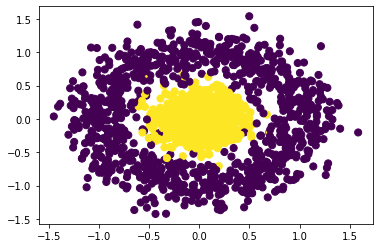

In [2]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 2000, noise = 0.2, factor = 0.05, random_state=2021)
plt.scatter(X[:,0], X[:,1], c = y, s = 50)
plt.show()

In [ ]:
print(X.shape)
print(y.shape)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2021)

In [5]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import pandas as pd

pipe_svc = make_pipeline(SVC(random_state = 2021))
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{'svc__C' : param_range, 'svc__kernel' : ['sigmoid'],
               'svc__gamma' : param_range}]
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid,
                  scoring = 'accuracy', cv = 3, refit = True, return_train_score = True)
gs = gs.fit(X_train, y_train)

In [6]:
print(gs.best_score_)
print(gs.best_params_)

0.7261179830325405
{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kernel': 'sigmoid'}


**-  C값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함) ; C가 클수록 이상치의 존재 가능성을 낮게 본다.**  
**-  gamma는 결정 경계를 얼마나 유연하게 그을 것인가 결정; gamma값을 높이면 학습 데이터에 많이 의존해서 결정 경계를 구불구불 긋게 되어 오버피팅 초래, gamma를 낮추면 학습 데이터에 별로 의존하지 않고 결정 경계를 직선에 가깝게 그어 언더피팅 발생하기 쉬움.**

In [11]:
df_gs = pd.DataFrame.from_dict(gs.cv_results_)
df_gs1 = df_gs[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score',
       'split1_test_score', 'split2_test_score']]
df_gs1.sort_values(by = 'rank_test_score', ascending=True )

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
21,"{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kerne...",0.726118,1,0.724832,0.729306,0.724215
26,"{'svc__C': 10.0, 'svc__gamma': 0.1, 'svc__kern...",0.620071,2,0.684564,0.659955,0.515695
32,"{'svc__C': 100.0, 'svc__gamma': 0.1, 'svc__ker...",0.617089,3,0.668904,0.666667,0.515695
31,"{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__ke...",0.614851,4,0.689038,0.639821,0.515695
27,"{'svc__C': 10.0, 'svc__gamma': 1.0, 'svc__kern...",0.574636,5,0.563758,0.572707,0.587444
16,"{'svc__C': 0.1, 'svc__gamma': 10.0, 'svc__kern...",0.558956,6,0.557047,0.559284,0.560538
33,"{'svc__C': 100.0, 'svc__gamma': 1.0, 'svc__ker...",0.535809,7,0.519016,0.568233,0.520179
22,"{'svc__C': 1.0, 'svc__gamma': 10.0, 'svc__kern...",0.529834,8,0.516779,0.565996,0.506726
34,"{'svc__C': 100.0, 'svc__gamma': 10.0, 'svc__ke...",0.525358,9,0.512304,0.559284,0.504484
28,"{'svc__C': 10.0, 'svc__gamma': 10.0, 'svc__ker...",0.525356,10,0.514541,0.559284,0.502242


In [12]:
import sklearn.metrics as metrics
from sklearn import svm

clf = svm.SVC(kernel = 'sigmoid', C = 1.0, gamma = 1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6742424242424242

In [13]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(y_test, y_pred)
print(a)

[[166 185]
 [ 30 279]]


In [14]:
clf1 = svm.SVC(kernel = 'sigmoid', C = 1.0, gamma = 100.0)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
metrics.accuracy_score(y_test, y_pred1)

0.48787878787878786

In [15]:
b = confusion_matrix(y_test, y_pred1)
print(b)

[[173 178]
 [160 149]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


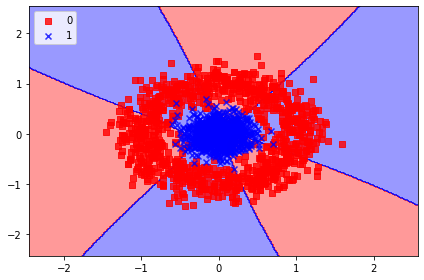

In [16]:
from matplotlib.colors import ListedColormap
import numpy as np

def versiontuple(v):
  return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        

svm1 = SVC(kernel = 'sigmoid', random_state = 2021, gamma = 1.0, C = 1.0)
svm1.fit(X, y)
plot_decision_regions(X, y, classifier = svm1)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


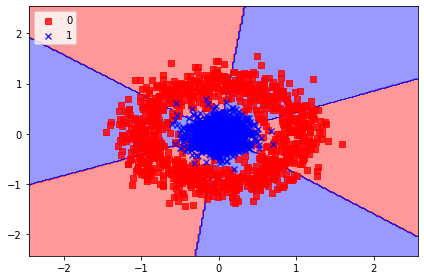

In [17]:
svm2 = SVC(kernel = 'sigmoid', random_state = 2021, gamma = 100.0, C = 1.0)
svm2.fit(X, y)
plot_decision_regions(X, y, classifier = svm2)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [18]:
import numpy as np

C_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-3, 3, 7)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(kernel='sigmoid'), param_grid=param_grid, cv=3)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(kernel = 'sigmoid', C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))

The best parameters are {'C': 1.0, 'gamma': 1.0} with a score of 0.70


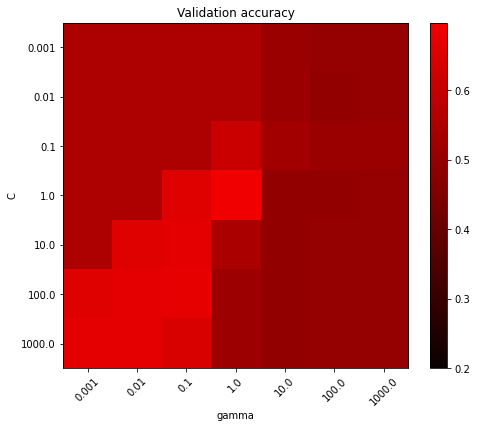

In [21]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()